Mean Square Power =  1.0106242150563403
Mean Square Power =  1.9993161563328399
Mean Square Power =  0.9851694148276704
Mean Square Power =  0.9999999999999999
0.0223388671875
0.0068359375
0.0855712890625


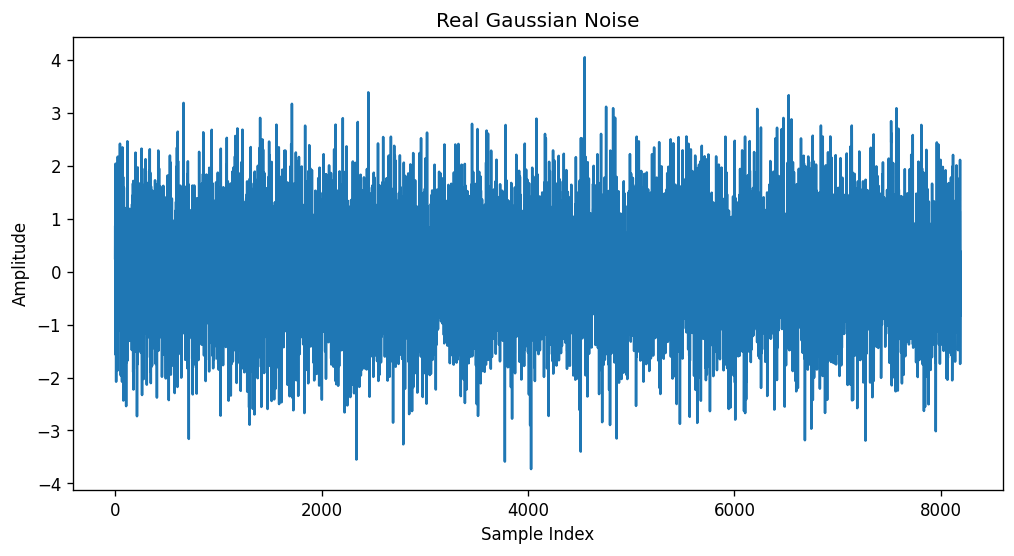

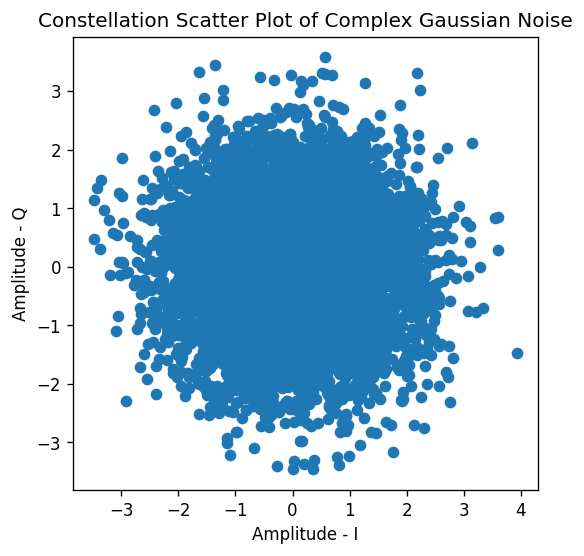

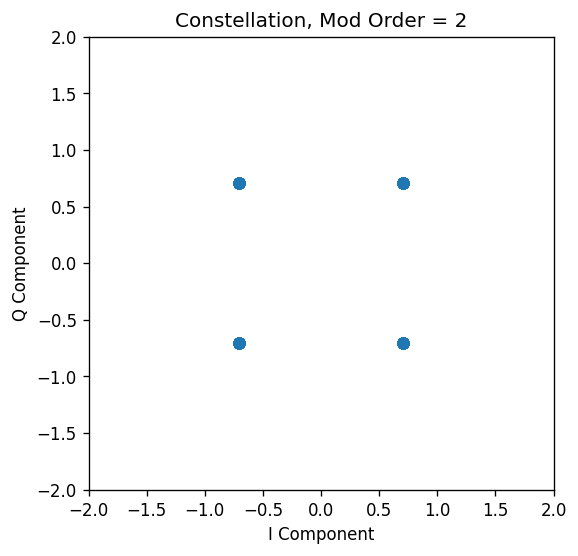

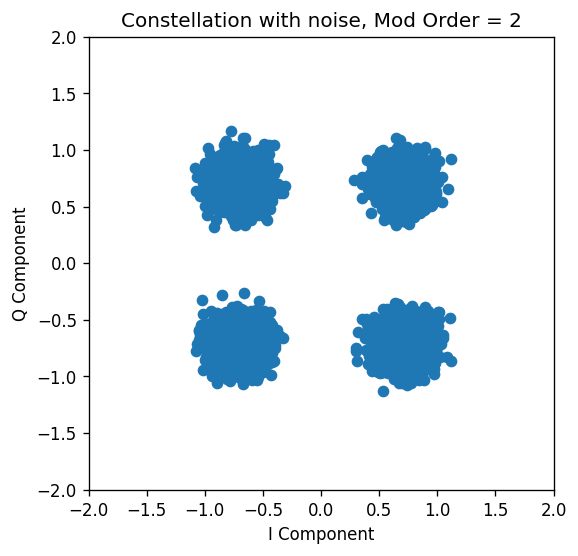

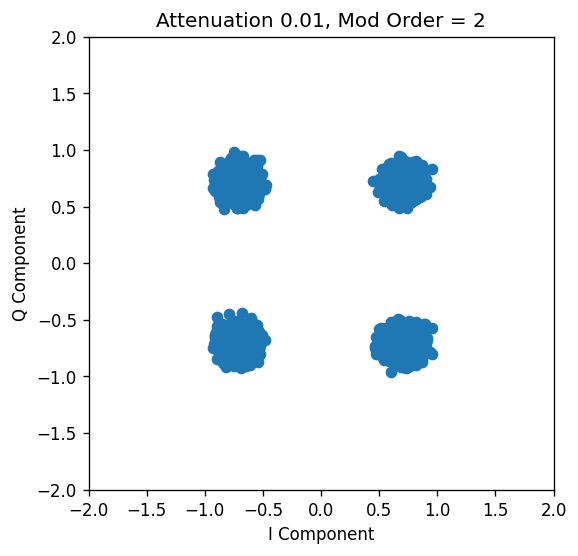

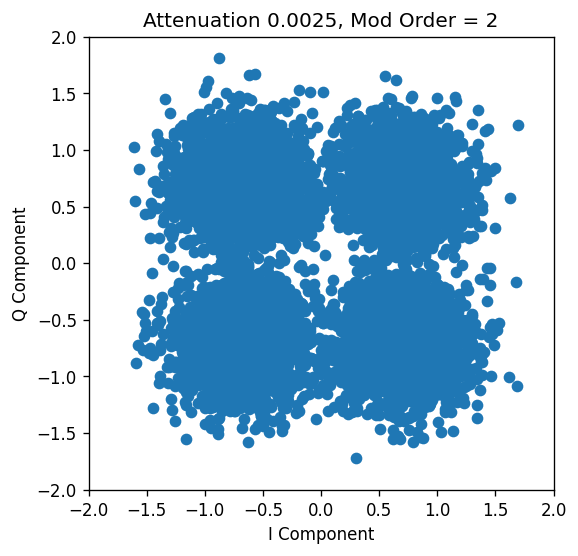

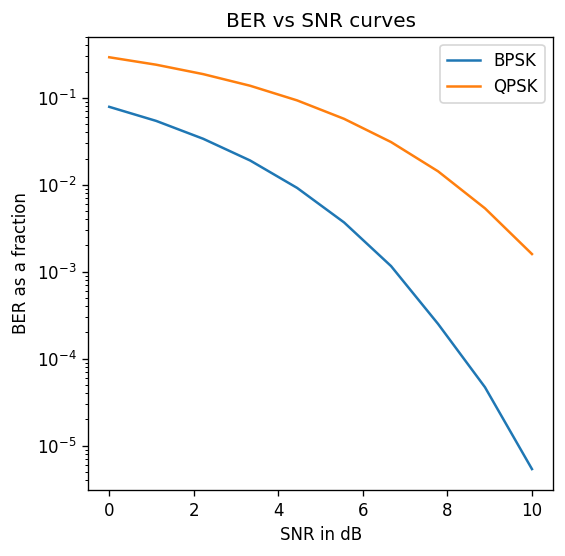

In [1]:
#Error Performance of QPSK
# The below is a command to force the ipynb to plot inline instead of popping a window
%matplotlib inline
import numpy as np 
import numpy.matlib
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal
from scipy import special
num_s = 8192; # Number of symbols
 
# The below command creates a num_s sized vector of samples drawn from a
# random normal distribution of variance 1.
z = np.random.normal(0,1,size=num_s);
 
# We'll look at the power of the signal and also plot it
power = (np.mean(np.abs(z**2))); # Mean Squared power
print("Mean Square Power = ",power)
fig = plt.figure(figsize=(10, 5), dpi= 120, facecolor='w', edgecolor='k');
plt.plot(z);
plt.ylabel('Amplitude');
plt.xlabel('Sample Index');
plt.title('Real Gaussian Noise');
 
 
# Complex Gaussian Noise
z_c = np.random.normal(0,1,size=num_s) + 1j*np.random.normal(0,1,size=num_s);
 
# We'll look at the power of the signal and also plot it
power = (np.mean(np.abs(z_c**2))); # MS power
print("Mean Square Power = ",power)
fig = plt.figure(figsize=(5, 5), dpi= 120, facecolor='w', edgecolor='k');
plt.scatter(np.real(z_c),np.imag(z_c));
plt.ylabel('Amplitude - Q');
plt.xlabel('Amplitude - I');
plt.title('Constellation Scatter Plot of Complex Gaussian Noise');
 
 
# Complex Gaussian Noise, unit power
n_v = (np.random.normal(0,1,size=num_s) + 1j*np.random.normal(0,1,size=num_s))/np.sqrt(2);
power = (np.mean(np.abs(n_v**2)));
print("Mean Square Power = ",power)
 
 
 
# Modulation order
mod_order = 2; # 1 for BPSK, 2 for QPSK or 4 for 16 QAM
 
# Number of bits (number of symbols is assumed fixed)
n_bits = num_s*mod_order;
 
# Generating random bits
bit_tx = numpy.random.randint(2, size=(n_bits,)) 
 
# Allocating space for the I and Q components
I_tx = np.zeros((int(num_s),),'complex');
Q_tx = np.zeros((int(num_s),),'complex');
 
# Modulation
if(mod_order == 4):
    # 16 QAM
    I_tx = 2*(bit_tx[::4] + 2*bit_tx[1::4] - 1.5)/np.sqrt(10);
    Q_tx = 2*(2*bit_tx[2::4] + bit_tx[3::4] - 1.5)/np.sqrt(10);
elif(mod_order == 2):
    # QPSK
    I_tx = (2*bit_tx[::2] - 1)/np.sqrt(2);
    Q_tx = (2*bit_tx[1::2] - 1)/np.sqrt(2);
elif(mod_order == 1):
    # BPSK
    I_tx = 2*bit_tx -1;
 
# Generating the transmit signal
sig_tx = I_tx + 1j*Q_tx;
 
power = (np.mean(np.abs(sig_tx**2)));
print("Mean Square Power = ",power)
fig = plt.figure(figsize=(5, 5), dpi= 120, facecolor='w', edgecolor='k');
plt.scatter(I_tx,Q_tx);
plt.xlim([-2,2]);
plt.ylim([-2,2]);
plt.xlabel('I Component');
plt.ylabel('Q Component');
plt.title('Constellation, Mod Order = '+str(mod_order));
 
# Transmit Gain (Usually fixed)
G_tx = 1e3;
# Channel Attenuation
G_a = 0.6e-2
 
sig_rx = G_a*G_tx*sig_tx + n_v;
sig_rx_n = sig_tx + n_v/(G_a*G_tx);
fig = plt.figure(figsize=(5, 5), dpi= 120, facecolor='w', edgecolor='k');
plt.scatter(np.real(sig_rx_n),np.imag(sig_rx_n));
plt.xlim([-2,2]);
plt.ylim([-2,2]);
plt.xlabel('I Component');
plt.ylabel('Q Component');
plt.title('Constellation with noise, Mod Order = '+str(mod_order));
 
 
 
# CASE 1
# In this scenario, the transmit gain is fixed (Assume the transmitter is a fixed WiFi Access point for example)
# There is a clear line of sight path and the attenuation is just .01
# Transmit Gain (Usually fixed)
G_tx = 1e3;
# Channel Attenuation
G_a = 1e-2;
 
sig_rx = G_a*G_tx*sig_tx + n_v;
sig_rx_n = sig_tx + n_v/(G_a*G_tx);
fig = plt.figure(figsize=(5, 5), dpi= 120, facecolor='w', edgecolor='k');
plt.scatter(np.real(sig_rx_n),np.imag(sig_rx_n));
plt.xlim([-2,2]);
plt.ylim([-2,2]);
plt.xlabel('I Component');
plt.ylabel('Q Component');
plt.title('Attenuation 0.01, Mod Order = '+str(mod_order));
 
 
 
# CASE 2
# You now move to a different room, and the WiFi access point is now blocked by walls and other furniture
# The attenuation worsens to 0.0025
# Transmit Gain (Usually fixed)
G_tx = 1e3;
# Channel Attenuation
G_a = 0.25*1e-2;
 
sig_rx = G_a*G_tx*sig_tx + n_v;
sig_rx_n = sig_tx + n_v/(G_a*G_tx);
fig = plt.figure(figsize=(5, 5), dpi= 120, facecolor='w', edgecolor='k');
plt.scatter(np.real(sig_rx_n),np.imag(sig_rx_n));
plt.xlim([-2,2]);
plt.ylim([-2,2]);
plt.xlabel('I Component');
plt.ylabel('Q Component');
plt.title('Attenuation 0.0025, Mod Order = '+str(mod_order));
 
 
 
def ber_awgn(num_s_o,mod_s,rel_pow):
    # num_s_0 - Number of symbols
    # mod_s - Modulation order
    # rel_pow - (G_a*G_tx)
    num_s = num_s_o;
    mod_order = mod_s; # 1,2 or 4
 
    n_bits = num_s*mod_order;
 
    bit_tx = numpy.random.randint(2, size=(n_bits,)) 
 
    I_tx = np.zeros((int(num_s),),'complex');
    Q_tx = np.zeros((int(num_s),),'complex');
 
    # Modulation
    if(mod_order == 4):
        # 16 QAM
        I_tx = 2*(bit_tx[::4] + 2*bit_tx[1::4] - 1.5)/np.sqrt(10);
        Q_tx = 2*(2*bit_tx[2::4] + bit_tx[3::4] - 1.5)/np.sqrt(10);
    elif(mod_order == 2):
        # QPSK
        I_tx = (2*bit_tx[::2] - 1)/np.sqrt(2);
        Q_tx = (2*bit_tx[1::2] - 1)/np.sqrt(2);
    elif(mod_order == 1):
        # BPSK
        I_tx = 2*bit_tx -1;
 
    sig_tx = I_tx + 1j*Q_tx;
    
    n_v = (np.random.normal(0,1,size=num_s)+1j*np.random.normal(0,1,size=num_s))/np.sqrt(2);
    
    sig_rx_n = sig_tx + n_v/np.sqrt(rel_pow);
    
    I_rx = np.real(sig_rx_n);
    Q_rx = np.imag(sig_rx_n);
 
    num_err = 0;
    # Demodulation & error detection
    if(mod_order == 4):
        # 16 QAM
        # Left as exercise for reader
        return -1;
    elif(mod_order == 2):
        # QPSK    
        for i in range(0,num_s):
            flag2 = (Q_rx[i]*Q_tx[i]) < 0;
            flag1 = (I_rx[i]*I_tx[i]) < 0;
            if(flag1|flag2):
                num_err = num_err+1;
    elif(mod_order == 1):
        # BPSK
        for i in range(0,num_s):
            flag1 = (I_rx[i]*I_tx[i]) < 0;
            if(flag1):
                num_err = num_err+1;
                
    return float(num_err/num_s)
 
# BPSK
# SNR = 2
err_1 = ber_awgn(8192,1,2);
print(err_1);
# BPSK
# SNR = 3
err_2 = ber_awgn(8192,1,3);
print(err_2);
# QPSK
# SNR = 3
err_3 = ber_awgn(8192,2,3);
print(err_3);
 
 
 
# BER Curve for BPSK
 
snr_v = np.logspace(0,1,10);
 
ber_vec_bpsk = np.zeros((10,),'float');
ber = 0;
j = 0;
for snr in snr_v:
    ber = 0;   
    for i in range(0,250):
        ber = ber+ber_awgn(8192,1,snr);
    ber_vec_bpsk[j] = ber/250;
    j = j+1;
# BER Curve for QPSK
 
ber_vec_qpsk = np.zeros((10,),'float');
ber = 0;
j = 0;
for snr in snr_v:
    ber = 0;   
    for i in range(0,250):
        ber = ber+ber_awgn(8192,2,snr);
    ber_vec_qpsk[j] = ber/250;
    j = j+1;
# Plotting the BER curves
 
fig = plt.figure(figsize=(5, 5), dpi= 120, facecolor='w', edgecolor='k');
plt.plot(10*np.log10(snr_v),ber_vec_bpsk);
plt.plot(10*np.log10(snr_v),ber_vec_qpsk);
plt.semilogy();
plt.title('BER vs SNR curves');
plt.xlabel('SNR in dB');
plt.ylabel('BER as a fraction');
plt.legend(['BPSK','QPSK']);